In [2]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
work_dir = os.getcwd()
data_folder = 'data/DNA'
parent_dir = os.path.abspath(os.path.join(work_dir, os.pardir))
data_path = os.path.join(parent_dir, data_folder)

files = os.listdir(data_path)

txt = []
for file in files:
 if file.endswith(".txt"):
        print(os.path.join(data_path, file))
        txt.append(os.path.join(data_path, file))


df_chi = pd.read_csv(txt[0], sep = "\t", names = ['Sequence','Class'], skiprows=1)
df_dog = pd.read_csv(txt[1], sep = "\t", names = ['Sequence','Class'], skiprows=1)
df_hum = pd.read_csv(txt[2], sep = "\t", names = ['Sequence','Class'], skiprows=1)

df_hum

d:\[3]--Python Workdir--[3]\data/DNA\chimpanzee.txt
d:\[3]--Python Workdir--[3]\data/DNA\dog.txt
d:\[3]--Python Workdir--[3]\data/DNA\human.txt


,Sequence,Class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [4]:
##=========================================Shannon Entropy=============================================

def shannon_entropy(sequence):
    entropy = 0
    for nucleo in {'A', 'T', 'G', 'C', 'N'}:
        freq = sequence.count(nucleo) / len(sequence)
        if freq > 0:
            entropy = entropy - (freq * math.log(freq,2))
    return entropy

def generate_seq_window(sequence, window_size=1000,step =1000):
    start=0
    end = window_size

    while end < len(sequence):
        yield sequence[start:end]

        start = start + step
        end = end + step

def shannon_sequence(sequence,fn_shannon):
    se_sequence = []
    for window in generate_seq_window(sequence):
        se = fn_shannon(window)
        se_sequence.append(se)
    return se_sequence

In [10]:
##=========================================Lempel Ziv Complexity==========================================

def string_to_binary(string_sequence):
    return ''.join(format(ord(x), 'b') for x in string_sequence)

def normalize_lz_sequence(lz_sequence, window_size=250):
    return [lz/window_size for lz in lz_sequence]


def lziv(binary_sequence):

    ss = set()
    n = len(binary_sequence)
    ind = 0
    inc = 0
    while True:
        if ind+inc >len(binary_sequence):
            break
        sub_string= binary_sequence[ind: ind+inc]
           # print(sub_string, ind, inc)
        if sub_string in ss:
            inc += 1
        else:
            ss.add(sub_string)
            ind+=1
            inc=1
           # print("Adding", sub_string)

    return len(ss)

def generate_lz_sequence(sequence):
    lz_sequence = []
    for window in generate_seq_window(sequence):
        encoded_sequence = string_to_binary(window)
        lz = lziv(encoded_sequence)
        lz_sequence.append(lz)
    
    return lz_sequence



In [6]:
##Generamos una secuencia larga de ADN

seq = df_hum['Sequence'].tolist()
print(len(seq))
dna = ''.join(seq)   #Join para unir toda la sequencia
len(dna)


4380


5534562

In [8]:
# Generamos entropia de Shannon

entropy = shannon_sequence(dna, lambda seqq : shannon_entropy(seqq)) # se le pasa la función en forma de lambda
len(entropy)


5534

Text(0.5, 0, 'N Position')

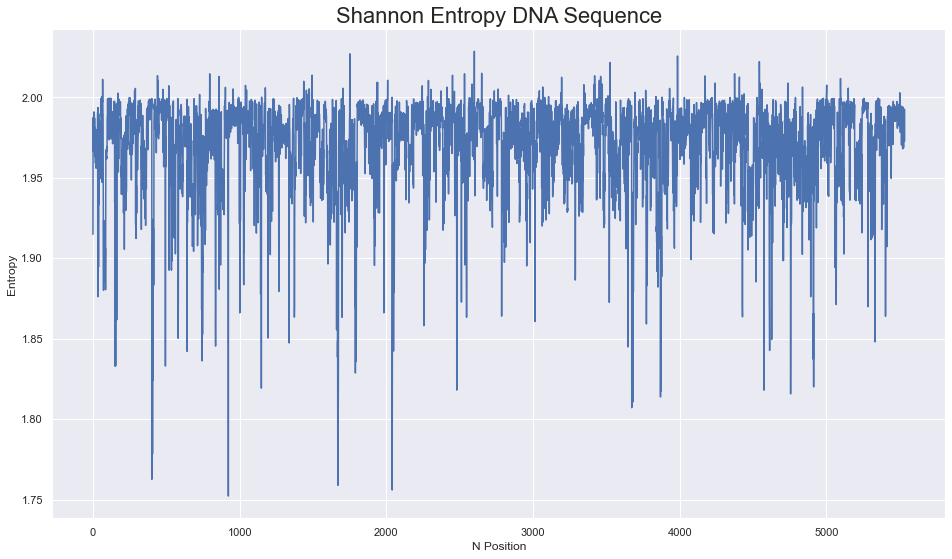

In [9]:
fig , ax = plt.subplots(figsize = (16,9))
ax.plot(entropy[0:10000])
ax.set_title('Shannon Entropy DNA Sequence', fontsize =22)
ax.set_ylabel('Entropy')
ax.set_xlabel('N Position')

In [11]:
# Lempel-Ziv Complejidad
lz_sequence = generate_lz_sequence(dna)
len(lz_sequence)

5534

In [12]:
# LZ complejidad normalizada
n_lz_sequence = normalize_lz_sequence(lz_sequence, 250)

Text(0.5, 0, 'N Position')

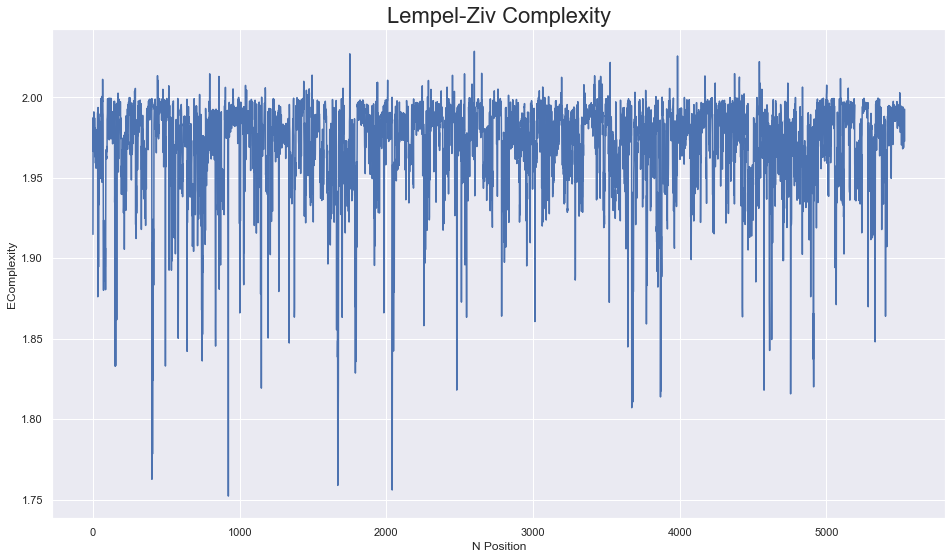

In [13]:
fig , ax = plt.subplots(figsize = (16,9))
ax.plot(entropy[0:10000])
ax.set_title('Lempel-Ziv Complexity', fontsize =22)
ax.set_ylabel('EComplexity')
ax.set_xlabel('N Position')